In [24]:
import pandas as pd

df = pd.read_csv("/content/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Netflix Movies and TV Shows Analysis

## Objective
The objective of this project is to analyze Netflix’s content library to uncover
trends related to content growth, content types, genres, country-wise production,
ratings, and duration patterns using visualizations and an interactive dashboard.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [26]:
df.shape



(8807, 12)

In [27]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]>

In [28]:
df.isna().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [29]:
# # Make an explicit copy first (this kills all SettingWithCopyWarnings)
# df = df.copy()

# # Fill missing categorical values safely
# df.loc[:, ['country', 'director', 'cast']] = (
#     df.loc[:, ['country', 'director', 'cast']].fillna('Unknown')
# )

# # Convert date_added safely
# df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# # Drop rows with invalid dates and copy again
# df = df.loc[df['date_added'].notna()].copy()

# # Explicitly ensure 'date_added' is datetime type after filtering, to prevent AttributeError
# df.loc[:, 'date_added'] = pd.to_datetime(df['date_added'])

# # Feature engineering
# df.loc[:, 'year_added'] = df['date_added'].dt.year
# df.loc[:, 'duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)
# df.loc[:, 'decade'] = (df['release_year'] // 10) * 10


df = df.copy()

# Fill missing categorical values
df[["country", "director", "cast"]] = df[["country", "director", "cast"]].fillna("Unknown")

# Convert to datetime (force) and drop invalid
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce", infer_datetime_format=True)
df = df[df["date_added"].notna()].copy()

# Make 100% sure dtype is datetime64
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
print("date_added dtype:", df["date_added"].dtype)  # should print datetime64[ns]

# Feature engineering
df["year_added"] = df["date_added"].dt.year
df["duration_numeric"] = pd.to_numeric(df["duration"].str.extract(r"(\d+)")[0], errors="coerce")
df["decade"] = (df["release_year"] // 10) * 10


date_added dtype: datetime64[ns]


/tmp/ipython-input-547836286.py:30: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce", infer_datetime_format=True)


Missing categorical values were replaced with 'Unknown'.  
The date_added column was converted to datetime format, and invalid dates were removed.  
Additional features such as year_added, duration_numeric, and decade were created to
support temporal and duration-based analysis.


In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

px.defaults.template = "plotly_white"
px.defaults.width = 980
px.defaults.height = 480

# Helpful: common ordering
TYPE_ORDER = ["Movie", "TV Show"]



### Q1. When did Netflix accelerate its content growth?
To understand Netflix’s expansion, we track how many titles were added each year and identify peak growth periods.


In [31]:
growth = df['year_added'].value_counts().sort_index().reset_index()
growth.columns = ["year_added", "titles_added"]

peak = growth.loc[growth["titles_added"].idxmax()]

fig = px.line(growth, x="year_added", y="titles_added", markers=True,
              title="Netflix Growth: Titles Added per Year")
fig.add_annotation(
    x=peak["year_added"], y=peak["titles_added"],
    text=f"Peak growth: {int(peak['titles_added'])} titles in {int(peak['year_added'])}",
    showarrow=True, arrowhead=2
)
fig.update_layout(xaxis_title="Year Added", yaxis_title="Titles Added")
fig.show()

print(f"Key Insight: Netflix added the most titles in {int(peak['year_added'])} ({int(peak['titles_added'])} titles).")


Key Insight: Netflix added the most titles in 2019 (1999 titles).


### Q2. Is Netflix primarily a movie platform or a TV platform?
We compare the catalog split to see whether Netflix leans more toward movies or series.






In [32]:
type_counts = df["type"].value_counts().reindex(TYPE_ORDER).fillna(0).reset_index()
type_counts.columns = ["type", "count"]
total = int(type_counts["count"].sum())

fig = px.pie(type_counts, names="type", values="count", hole=0.55,
             title="Catalog Split: Movies vs TV Shows")
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.add_annotation(text=f"Total<br>{total}", x=0.5, y=0.5, showarrow=False, font_size=16)
fig.show()

dominant = type_counts.sort_values("count", ascending=False).iloc[0]
print(f"Key Insight: The catalog is dominated by {dominant['type']} ({int(dominant['count'])} titles).")


Key Insight: The catalog is dominated by Movie (6131 titles).


### Q3. Which countries shape Netflix’s catalog the most?
Netflix is a global platform. This chart highlights the countries that contribute the largest number of titles.


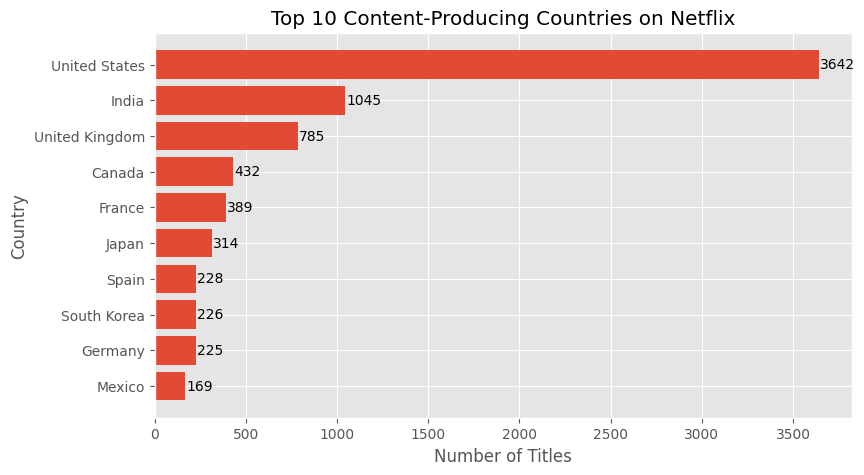

Key Insight: United States leads content production with 3642 titles among the top countries.


In [33]:
import matplotlib.pyplot as plt

top_countries = (
    df["country"]
    .str.split(", ")
    .explode()
    .value_counts()
    .drop(index=["Unknown"], errors="ignore")
    .head(10)
)

top_countries = top_countries.sort_values()

plt.figure(figsize=(9,5))
plt.barh(top_countries.index, top_countries.values)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Content-Producing Countries on Netflix")

for i, v in enumerate(top_countries.values):
    plt.text(v + 5, i, str(v), va='center')

plt.show()

leader_country = top_countries.idxmax()
leader_value = top_countries.max()
print(
    f"Key Insight: {leader_country} leads content production with "
    f"{leader_value} titles among the top countries."
)


### Q4. How has the balance between Movies and TV Shows changed over time?
Instead of just counting titles, we examine how the *mix* of content types evolved year by year.


In [34]:
year_type = (
    df.groupby(["year_added", "type"])
      .size().reset_index(name="titles")
)

fig = px.area(year_type, x="year_added", y="titles", color="type",
              category_orders={"type": TYPE_ORDER},
              title="Titles Added Over Time by Content Type (Stacked Area)")
fig.update_layout(xaxis_title="Year Added", yaxis_title="Titles Added")
fig.show()

latest_year = int(df["year_added"].max())
latest_mix = year_type[year_type["year_added"] == latest_year].sort_values("titles", ascending=False).iloc[0]
print(f"Key Insight: In {latest_year}, the larger share of additions was {latest_mix['type']} ({int(latest_mix['titles'])} titles).")


Key Insight: In 2021, the larger share of additions was Movie (993 titles).


### Q5. What genres dominate Netflix’s library?
We break down Netflix’s genre tags to see what content categories are most common.


In [35]:
top_genres = (
    df["listed_in"].str.split(", ")
    .explode().value_counts()
    .head(12).reset_index()
)
top_genres.columns = ["genre", "count"]

fig = px.bar(top_genres.sort_values("count"),
             x="count", y="genre", orientation="h",
             title="Most Common Genres on Netflix (Top 12)",
             text="count")
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_title="Count", yaxis_title="")
fig.show()

g1 = top_genres.iloc[0]
print(f"Key Insight: The most common genre tag is '{g1['genre']}' ({int(g1['count'])} titles).")


Key Insight: The most common genre tag is 'International Movies' (2752 titles).


### Q6. What audience segments does Netflix target (via ratings)?
Ratings indicate maturity level and help understand whether the platform skews more family-friendly or adult-focused.


In [36]:
rating_counts = df["rating"].fillna("Unknown").value_counts().reset_index()
rating_counts.columns = ["rating", "count"]

fig = px.bar(rating_counts, x="rating", y="count",
             title="Content Ratings Distribution",
             text="count")
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_title="Rating", yaxis_title="Titles")
fig.show()

top_rating = rating_counts.iloc[0]
print(f"Key Insight: The most frequent rating is {top_rating['rating']} ({int(top_rating['count'])} titles).")


Key Insight: The most frequent rating is TV-MA (3183 titles).


### Q7. Do Movies and TV Shows differ in length characteristics?
A distribution plot is more informative than averages. This helps compare typical lengths and outliers.


In [37]:
import numpy as np
import pandas as pd
import plotly.express as px

# Clean duration into separate columns
df = df.copy()
df["duration_num"] = pd.to_numeric(df["duration"].str.extract(r"(\d+)")[0], errors="coerce")
df["duration_unit"] = df["duration"].str.extract(r"([A-Za-z]+)")[0].str.lower()

# Movies: minutes only
movies = df[(df["type"] == "Movie") & (df["duration_unit"].str.contains("min", na=False))].copy()

# TV Shows: seasons only
tv = df[(df["type"] == "TV Show") & (df["duration_unit"].str.contains("season", na=False))].copy()

movies["minutes"] = movies["duration_num"]
tv["seasons"] = tv["duration_num"]


In [38]:
movies_plot = movies[(movies["minutes"] >= 30) & (movies["minutes"] <= 250)]
tv_plot = tv[(tv["seasons"] >= 1) & (tv["seasons"] <= 15)]

fig = px.histogram(
    movies_plot, x="minutes",
    nbins=30,
    title="Movie Duration Distribution (Minutes)"
)
fig.update_layout(xaxis_title="Minutes", yaxis_title="Number of Movies")
fig.show()

fig = px.histogram(
    tv_plot, x="seasons",
    nbins=15,
    title="TV Show Length Distribution (Seasons)"
)
fig.update_layout(xaxis_title="Seasons", yaxis_title="Number of TV Shows")
fig.show()


### Q8. Which country–genre combinations appear most frequently?
To understand cultural specialization, we examine how countries and genres intersect using a heatmap.


In [39]:
cg = (df.assign(country=df["country"].str.split(", "))
        .explode("country")
        .assign(genre=df["listed_in"].str.split(", "))
        .explode("genre"))

pivot = pd.crosstab(cg["country"], cg["genre"])

top_c = pivot.sum(axis=1).sort_values(ascending=False).head(6).index
top_g = pivot.sum(axis=0).sort_values(ascending=False).head(8).index
mat = pivot.loc[top_c, top_g]

fig = px.imshow(mat, text_auto=True,
                title="Country × Genre Concentration (Top Countries & Genres)")
fig.update_layout(xaxis_title="Genre", yaxis_title="Country")
fig.show()

# strongest cell
max_idx = np.unravel_index(np.argmax(mat.values), mat.shape)
best_country = mat.index[max_idx[0]]
best_genre = mat.columns[max_idx[1]]
best_val = int(mat.values[max_idx])
print(f"Key Insight: The strongest combination is {best_country} × {best_genre} ({best_val} titles).")


Key Insight: The strongest combination is India × International Movies (864 titles).


In [40]:
import plotly.io as pio
pio.renderers.default = "colab"


### Q9. Have movies gotten longer or shorter over time?
We plot the average movie duration by release year and add a rolling average to make long-term trends clearer.


In [41]:
import pandas as pd
import numpy as np

df = df.copy()

# Extract numeric duration and unit from the original 'duration' column
df["duration_num"] = pd.to_numeric(df["duration"].str.extract(r"(\d+)")[0], errors="coerce")
df["duration_unit"] = df["duration"].str.extract(r"([A-Za-z]+)")[0].str.lower()

# Movies only (minutes)
movies = df[(df["type"] == "Movie") & (df["duration_unit"].str.contains("min", na=False))].copy()
movies["minutes"] = movies["duration_num"]

# Optional: remove weird values so the trend looks good
movies = movies[(movies["minutes"].notna()) & (movies["minutes"] >= 30) & (movies["minutes"] <= 250)]


In [42]:
import plotly.graph_objects as go

avg_dur = movies.groupby("release_year")["minutes"].mean().reset_index()
avg_dur = avg_dur.sort_values("release_year")
avg_dur["rolling_5y"] = avg_dur["minutes"].rolling(5, min_periods=1).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=avg_dur["release_year"], y=avg_dur["minutes"],
    mode="lines+markers", name="Yearly Avg"
))
fig.add_trace(go.Scatter(
    x=avg_dur["release_year"], y=avg_dur["rolling_5y"],
    mode="lines", name="5-Year Rolling Avg"
))

fig.update_layout(
    title="Movie Duration Trend Over Time",
    xaxis_title="Release Year",
    yaxis_title="Avg Duration (minutes)"
)

fig.show()

print(
    f"Key Insight: Average movie duration fluctuates year-to-year, while the 5-year rolling line shows the long-term direction."
)


Key Insight: Average movie duration fluctuates year-to-year, while the 5-year rolling line shows the long-term direction.


### Q10. Which decades dominate Netflix’s catalog?
This chart shows whether Netflix’s catalog is concentrated in modern decades or includes substantial older content.


In [43]:
dec_type = df.groupby(["decade", "type"]).size().reset_index(name="titles")

fig = px.bar(dec_type, x="decade", y="titles", color="type",
             barmode="group", category_orders={"type": TYPE_ORDER},
             title="Titles by Decade (Movies vs TV Shows)")
fig.update_layout(xaxis_title="Decade", yaxis_title="Titles")
fig.show()

top_dec = dec_type.groupby("decade")["titles"].sum().sort_values(ascending=False).index[0]
print(f"Key Insight: The decade with the most titles in the dataset is {int(top_dec)}s.")


Key Insight: The decade with the most titles in the dataset is 2010s.
